----

## Uczenie Maszynowe Część 4

#### Wprowadzenie do uczenia nadzorowanego. Problem przewidywania klas. Klasyfikacja binarna i wieloklasowa.

----

```




```

----

##### Zadania

----

> Zadanie 1
>> Zbiór Danych :

**Zbiór danych dotyczący pasażerów statku rejsowego Titanic, będzie wykorzystany w celu
predykcji czy dany pasażer przeżył katastrofę:**
* PassengerId - numer identyfikacyjny pasażera,
* Survived - zmienna określająca, czy dany pasażer przeżył katastrofę (1) czy nie (0),
* Pclass - zmienna określająca, czy pasażer podróżował w klasie 1, 2 czy 3,
* Name - imię i nazwisko pasażera,
* Sex - płeć pasażera,
* Age - wiek pasażera,
* SibSp - liczba członków rodziny znajdująca się na pokładzie statku (rodzeństwo/małżonkowie),
* Parch - liczba członków rodziny znajdująca się na pokładzie statku (rodzice/dzieci),
* Ticket - sygnatura biletu,
* Fare - cena biletu,
* Cabin - numer zajmowanej kajuty,
* Embarked - zmienna określająca czy pasażer wsiadł na pokład w porcie Cherbourg, Queenstown lub Southampton.

>1.1.Import modułów.

In [1]:
 # pip install pandas matplotlib numpy scikit-learn seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

>1.2. Wczytanie Danych.

In [3]:
#df = pd.read_csv('titanic_train.csv', names=['PassengerId',  'Survived',  'Pclass',  'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], sep=r',') 
df = pd.read_csv('titanic_train.csv', sep=r',') 

#Wywołanie obiektu df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


>1.3. Sprawdzenie podstawowych statystyk.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>1.4. Sprawdzenie kompletności danych.

In [5]:
df.info()

data_types = df.dtypes
print("\nTypy Danych:")
print(data_types)

duplicate_rows = df[df.duplicated()]
print("\nDublikaty:")
print(duplicate_rows)
##brak duplikatów

null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print("\nTutaj najpierw stosujemy isnull()metodę do całej ramki danych, która zwraca maskę logiczną wskazującą, czy każdy element jest nullem, czy nie. \nNastępnie stosujemy any(axis=1)metodę do wyniku, aby sprawdzić, czy jakakolwiek wartość w każdym wierszu jest nullem. \nNa koniec używamy tej maski logicznej, aby wybrać wiersze, które mają wartości null.\n\n",null_rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Typy Danych:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64


>1.5. Wizualizacja:

>>1.5.1. Wykres podział liczby osób ze względu na przetrwanie katastrofy.

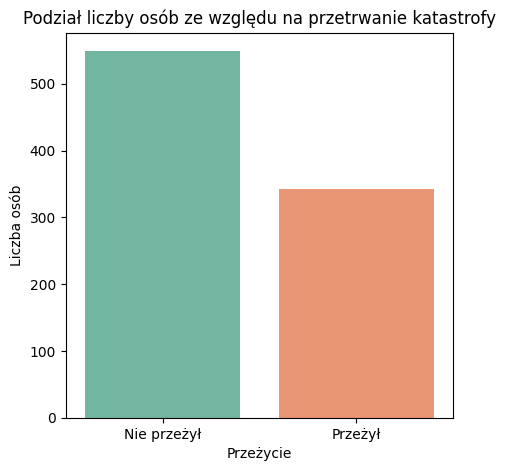

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',hue='Survived', data=df ,palette='Set2', legend=False)
plt.title('Podział liczby osób ze względu na przetrwanie katastrofy')
plt.xticks([0, 1], ['Nie przeżył', 'Przeżył'])
plt.xlabel('Przeżycie')
plt.ylabel('Liczba osób')
plt.show()

>>1.5.2. Wykres podział przeżycia osób względem płci.

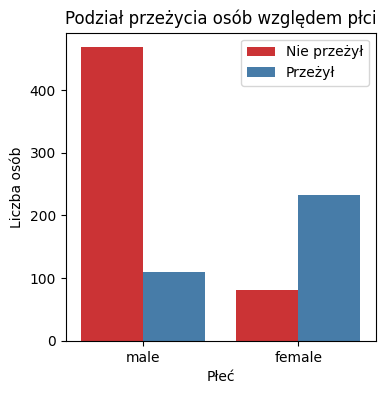

In [7]:
plt.figure(figsize=(4,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Podział przeżycia osób względem płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.legend(['Nie przeżył', 'Przeżył'])
plt.show()

>>1.5.3. Wykres podział przeżycia osób, względem klasy biletów.

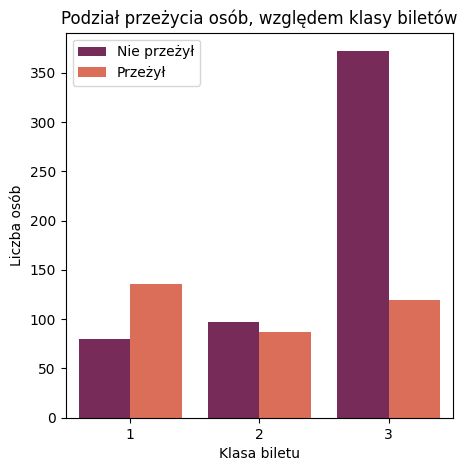

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='rocket')
plt.title('Podział przeżycia osób, względem klasy biletów')
plt.xlabel('Klasa biletu')
plt.ylabel('Liczba osób')
plt.legend(['Nie przeżył', 'Przeżył'])
plt.show()

>>1.5.4. Wykres Podział pasażerów ze względu na wiek.

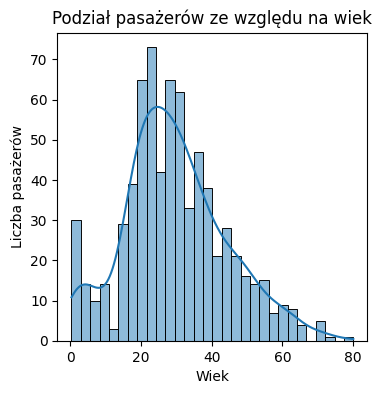

In [9]:
plt.figure(figsize=(4,4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Podział pasażerów ze względu na wiek')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.show()

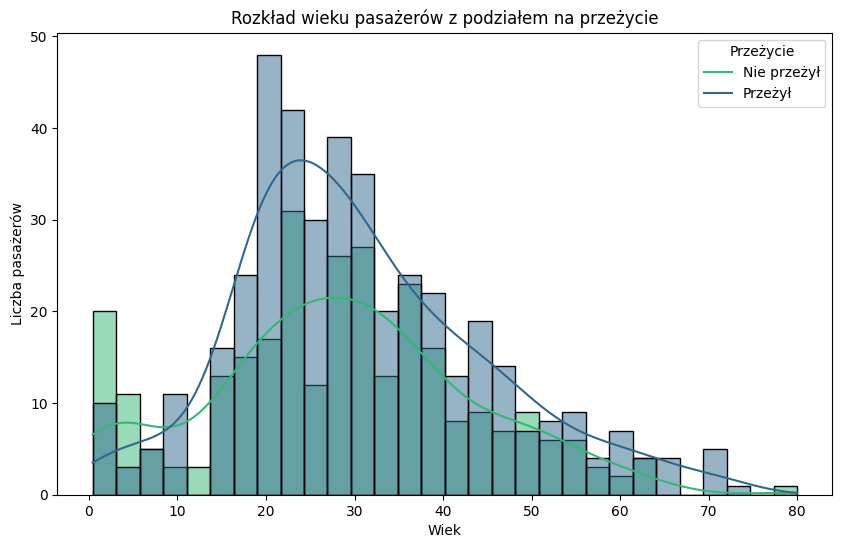

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='viridis')

# Dodanie tytułów i etykiet
plt.title('Rozkład wieku pasażerów z podziałem na przeżycie')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Przeżycie', labels=['Nie przeżył', 'Przeżył'])
plt.show()

>>1.5.5. Wykres Podział pasażerów ze względu liczbę współpasażerów z rodziny.

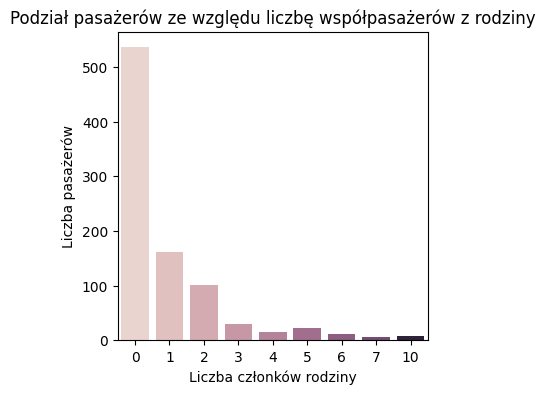

In [11]:
plt.figure(figsize=(4,4))
df['Family_Size'] = df['SibSp'] + df['Parch']
sns.countplot(x='Family_Size', hue='Family_Size', data=df, legend=False)
plt.title('Podział pasażerów ze względu liczbę współpasażerów z rodziny')
plt.xlabel('Liczba członków rodziny')
plt.ylabel('Liczba pasażerów')
plt.show()


>>1.5.6. Wykres podział biletów ze względu na cenę.

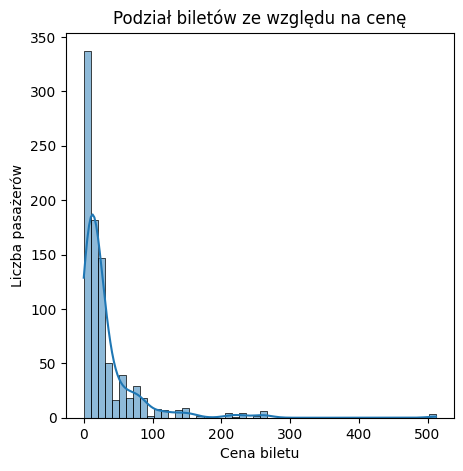

In [12]:
plt.figure(figsize=(5,5))
sns.histplot(df['Fare'], bins=50, kde=True)
plt.title('Podział biletów ze względu na cenę')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.show()

>2. Przygotowanie danych:

>>2.1. Sprawdzenie brakujących danych.

In [13]:
missing_values = df.isnull().sum()
print("Brakujące dane:")
print(missing_values)

Brakujące dane:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
dtype: int64


>>2.2. Wizualizacja:

>>>2.2.1. Heatmapa ze względu na liczbę brakujących danych.

In [14]:
# pip install missingno

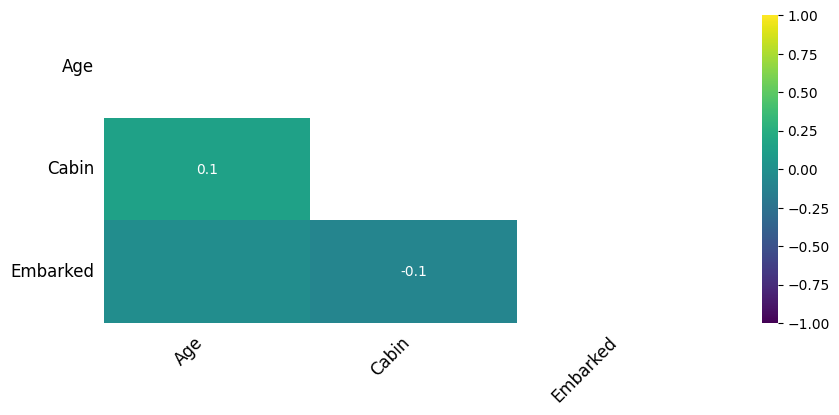

In [15]:
import missingno as msno

hm = msno.heatmap(df, figsize=(10,4), cmap="viridis", fontsize=12)

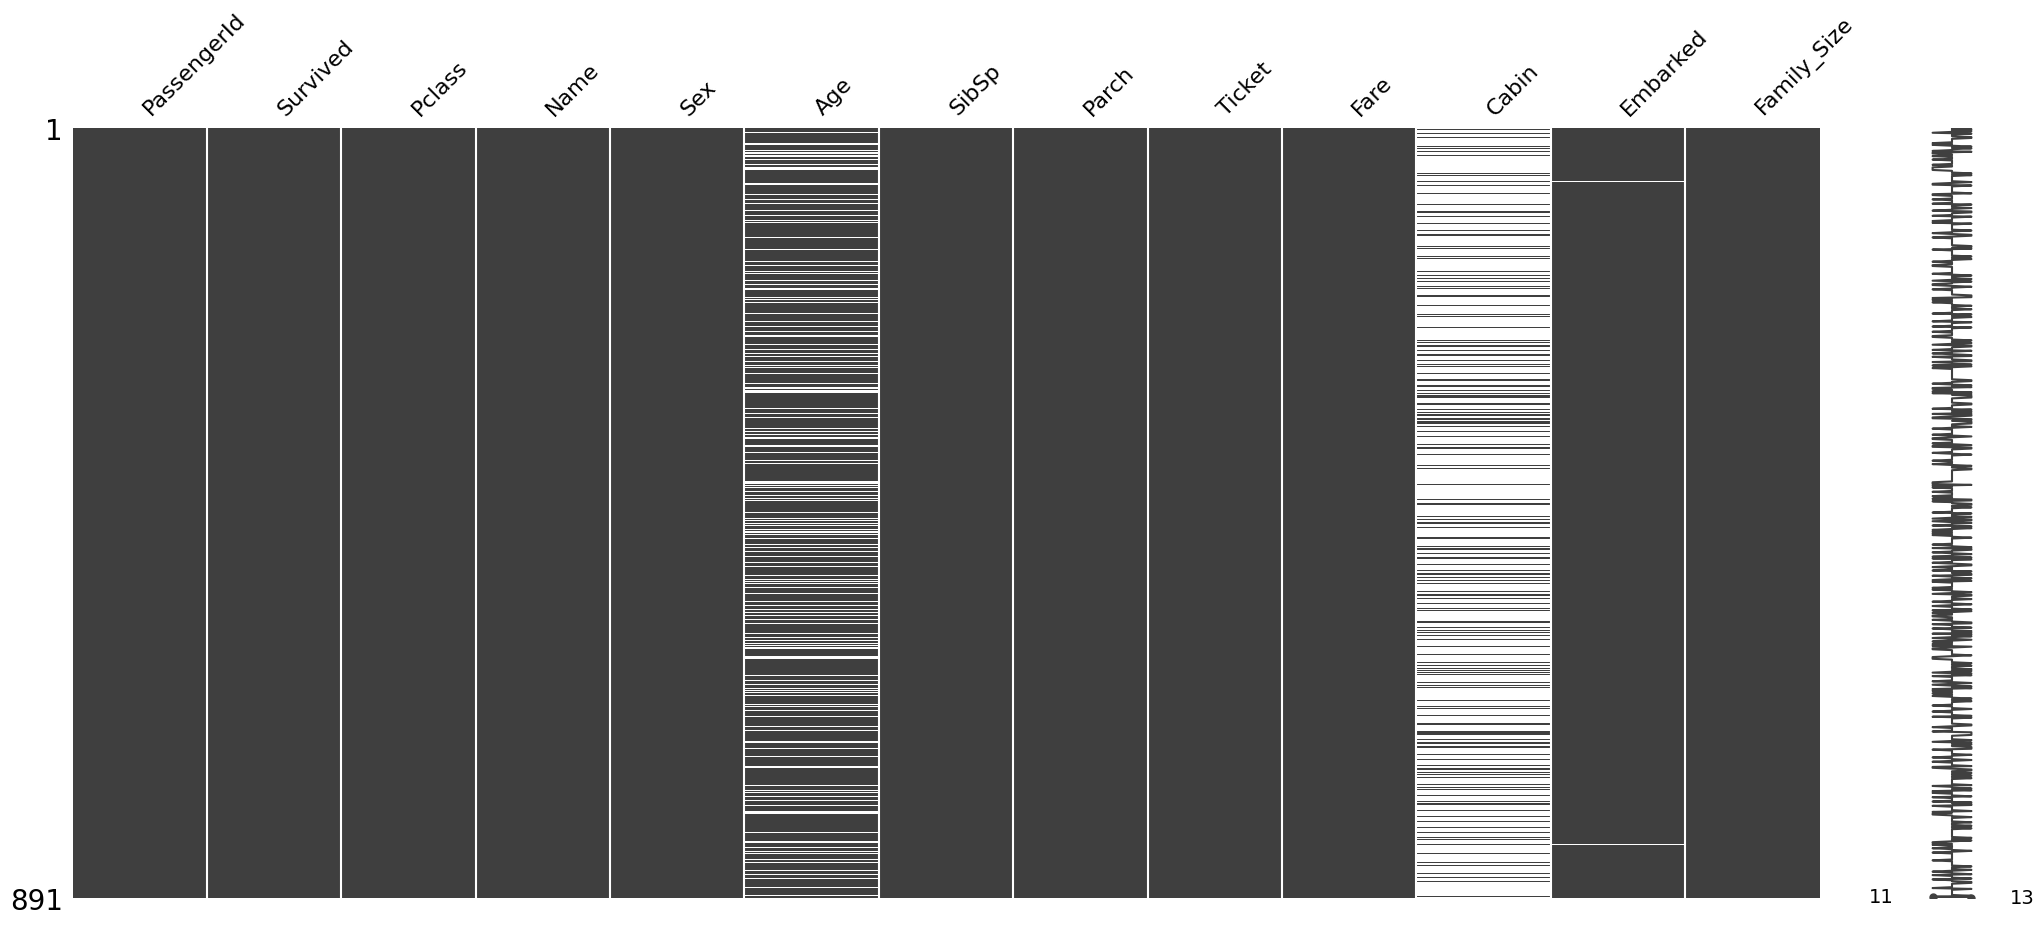

In [16]:
mtx = msno.matrix(df)

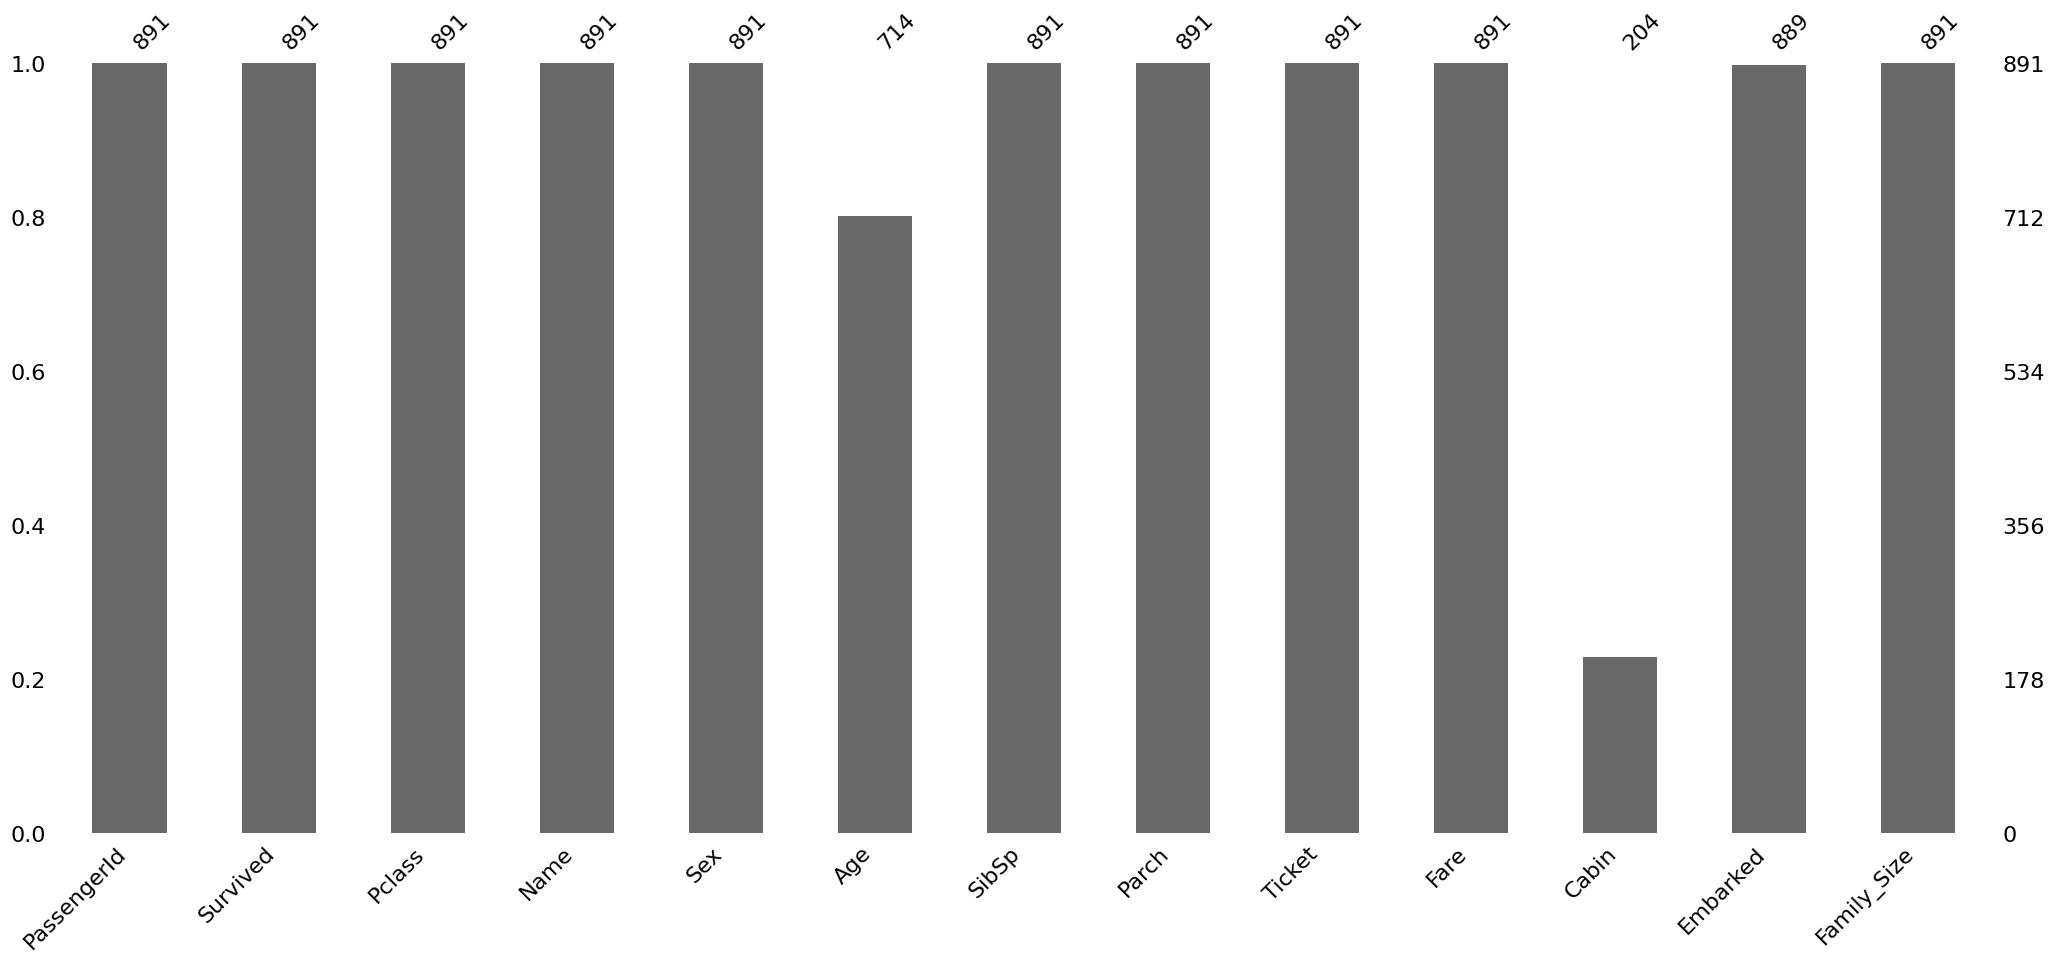

In [17]:
br = msno.bar(df)

>>2.3. Data Cleaning:

>>>2.3.1. Age - brakujące dane.

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df = df.astype({"Age": 'int'})

#Wyswietlenie wyniku zmian
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 891, dtype: int64

>>>2.3.2. Cabin - usunięcie kolumny.

In [19]:
df.drop(columns=['Cabin'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,0


>>>2.3.3. Embarked - usunięcie wiersza NaN.

In [20]:
df.dropna(subset=['Embarked'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,0


>>2.4. Przekształcenie danych kategorialnych:

>>>2.4.1. Dummying: płeć i miejsce wejścia na pokład.

In [21]:
dummies_columns = pd.get_dummies(df[['Sex', 'Embarked']], columns=['Sex', 'Embarked'])

In [22]:
df = df.join(dummies_columns)

>>>2.4.2. Usunięcie kolumn 'Sex', 'Embarked', 'Name', 'Ticket' z danych.

In [23]:
df.drop(columns=['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True)

>>>2.4.3. Obiekt z przetworzonych danych treningowych + zmienna dotycząca płci + zmienna dotycząca embark.

In [24]:
df_titanic = df.copy()

In [25]:
df_titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7.2500,1,False,True,False,False,True
1,2,1,1,38,1,0,71.2833,1,True,False,True,False,False
2,3,1,3,26,0,0,7.9250,0,True,False,False,False,True
3,4,1,1,35,1,0,53.1000,1,True,False,False,False,True
4,5,0,3,35,0,0,8.0500,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13.0000,0,False,True,False,False,True
887,888,1,1,19,0,0,30.0000,0,True,False,False,False,True
888,889,0,3,28,1,2,23.4500,3,True,False,False,False,True
889,890,1,1,26,0,0,30.0000,0,False,True,True,False,False


>>>2.4.4. Usunięcie kolumny 'PassengerId'.

In [26]:
df_titanic.drop(columns=['PassengerId'], inplace=True)

In [27]:
df_titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,False,True,False,False,True
1,1,1,38,1,0,71.2833,1,True,False,True,False,False
2,1,3,26,0,0,7.9250,0,True,False,False,False,True
3,1,1,35,1,0,53.1000,1,True,False,False,False,True
4,0,3,35,0,0,8.0500,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,0,False,True,False,False,True
887,1,1,19,0,0,30.0000,0,True,False,False,False,True
888,0,3,28,1,2,23.4500,3,True,False,False,False,True
889,1,1,26,0,0,30.0000,0,False,True,True,False,False


>Podział zbioru danych na treningowy i testowy:

>>3.1. Zmienna X wszystkie kolumny z zestawu danych df_titanic (macierz cech) oprócz kolumny Survived.

In [28]:
X = df_titanic.drop(labels='Survived', axis=1)

#Wyswietlenie X:
X

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7.2500,1,False,True,False,False,True
1,1,38,1,0,71.2833,1,True,False,True,False,False
2,3,26,0,0,7.9250,0,True,False,False,False,True
3,1,35,1,0,53.1000,1,True,False,False,False,True
4,3,35,0,0,8.0500,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,0,False,True,False,False,True
887,1,19,0,0,30.0000,0,True,False,False,False,True
888,3,28,1,2,23.4500,3,True,False,False,False,True
889,1,26,0,0,30.0000,0,False,True,True,False,False


>>3.2. Zmienna y dane z kolumny Survived.

In [29]:
y = df_titanic['Survived']

#Wyswietlenie y:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

>>3.3. Zmienne X_train, X_test, y_train, y_test dane z podziału X i y na dane uczące i testowe.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

>4. Obiekt regresji logistycznej.

In [31]:
lr_model = LogisticRegression(max_iter=900)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

>5. Wykorzystanie wytrenowanego modelu do prognozowania wyników dla nowych przypadków.

In [32]:
y_pred = lr_model.predict(X_test)

#Wyświetlenie y_pred
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

>6. Ewaluacja modelu:

>>6.1. Ewaluacja modelu za pomocą raportu z klasyfikacji oraz macierzy błędów.

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

[[98  9]
 [24 47]]


>>6.2. Krzywa ROC.

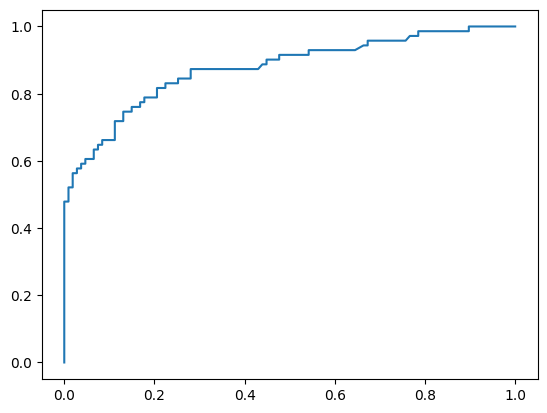

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.show()

>>6.3. Krzywa czułość/precyzja.

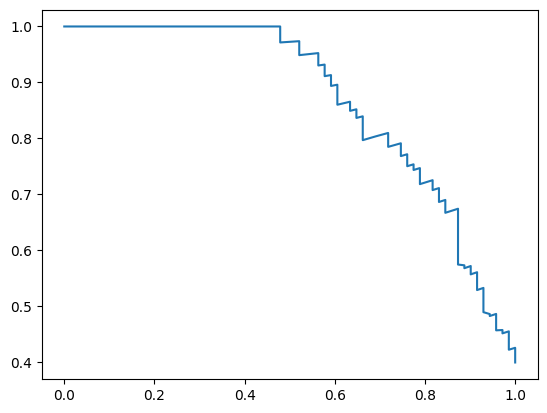

In [35]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(recall, precision)
plt.show()

----

```



```

----

>Zadanie 2

>> Zbiór Danych

**Zbiór danych dotyczy kilku rodzajów irysów. Każdy irys jest opisany za pomocą 4 cech
(długość i szerokość kielicha, długość i szerokość płatka).**

----

> Zadanie 2a

Model regresji logistycznej rozpoznający gatunek Iris virginica na podstawie szerokości płatka.

>2.1. Wczytanie danych.

In [36]:
df_iris = pd.read_csv('iris.csv', sep=r',') 

#Wywołanie obiektu df
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


>2.2. Sprawdzenie kompletności danych.

In [37]:
df_iris.info()

data_types = df_iris.dtypes
print("\nTypy Danych:")
print(data_types)

duplicate_rows = df_iris[df_iris.duplicated()]
print("\nDublikaty:")
print(duplicate_rows)
##brak duplikatów

null_mask = df_iris.isnull().any(axis=1)
null_rows = df_iris[null_mask]

print("\nTutaj najpierw stosujemy isnull()metodę do całej ramki danych, która zwraca maskę logiczną wskazującą, czy każdy element jest nullem, czy nie. \nNastępnie stosujemy any(axis=1)metodę do wyniku, aby sprawdzić, czy jakakolwiek wartość w każdym wierszu jest nullem. \nNa koniec używamy tej maski logicznej, aby wybrać wiersze, które mają wartości null.\n\n",null_rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Typy Danych:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Dublikaty:
     sepal_length  sepal_width  petal_length  petal_width    species
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
142           5.8          2.7           5.1          1.9  virginica

Tutaj najpierw stosujemy isnull()metodę do całej ramki danych, która zwraca maskę logiczną wskazującą, czy

>2.3. Sprawdzenie statystyk podstawowych, informacji nt. danych.

In [38]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


>2.4. Wykres punktowy zależności długości płatka w funkcji szerokości płatka, dane
różnicowane za pomocą gatunku/rodzaju.

<Axes: xlabel='petal_length', ylabel='petal_width'>

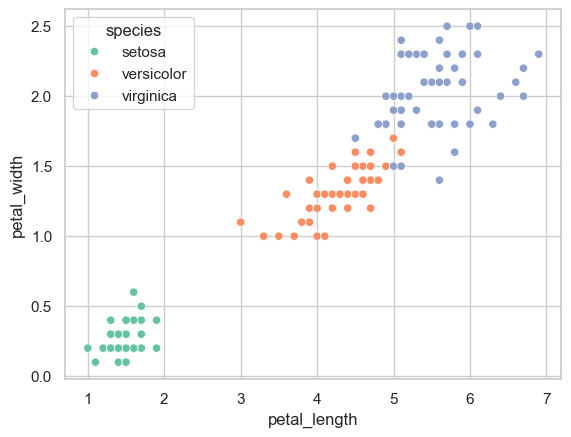

In [39]:
sns.set(style='whitegrid')
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='species', palette='Set2')

>2.5. Wykres punktowy zależności długości kielicha w funkcji szerokości kielicha, dane
różnicowane za pomocą gatunku/rodzaju.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

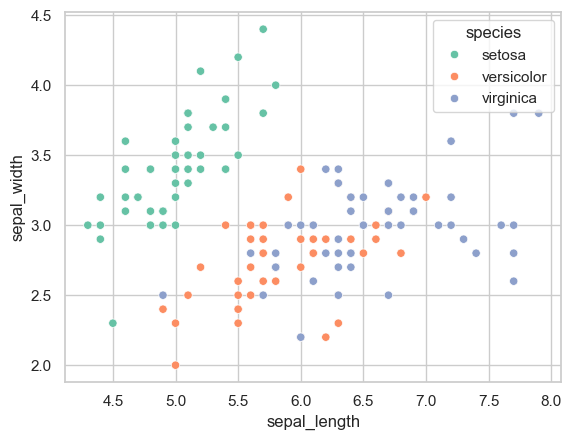

In [40]:
sns.scatterplot(data=df_iris, x='sepal_length', y='sepal_width', hue='species', palette='Set2')

>2.6. Wykres porównawczy składający się z macierzy par wszystkich zmiennych,
różnicowanych na podstawie kolumny 'species'.

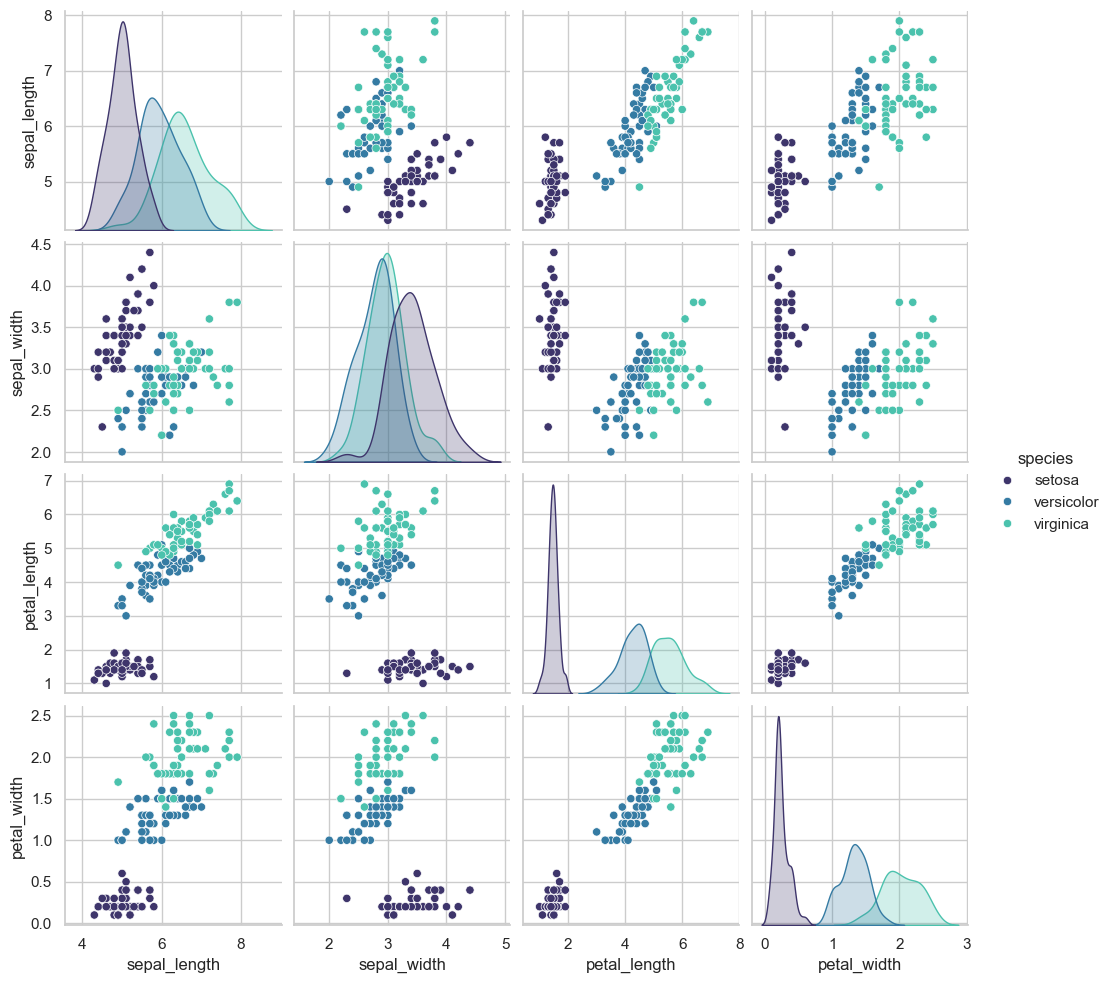

In [41]:
sns.pairplot(df_iris, hue="species", palette='mako')

>2.7. Mapa (heatmapa) korelacji.

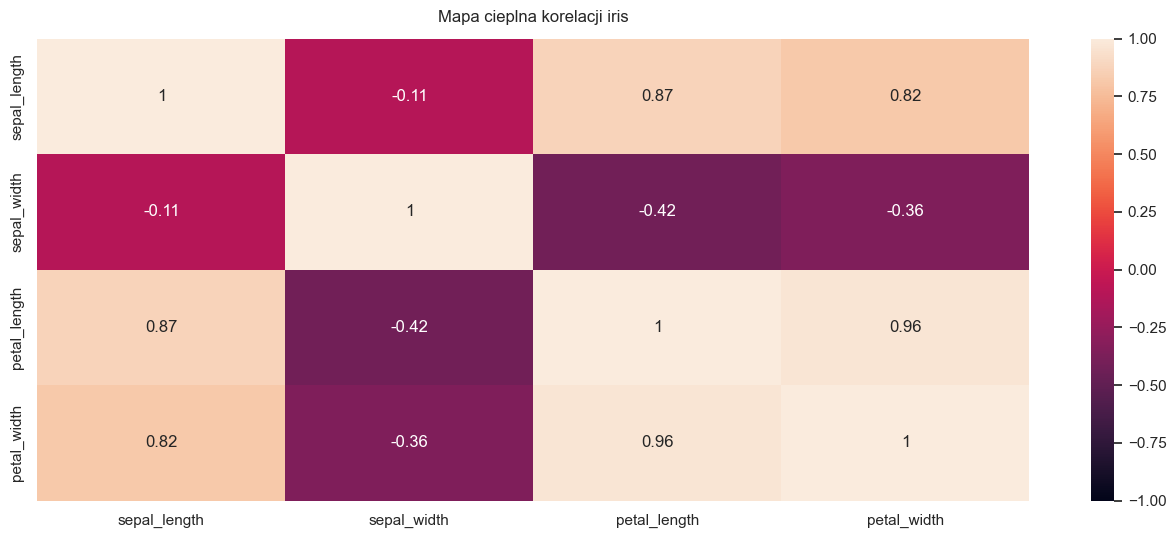

In [42]:
plt.figure(figsize=(16, 6))
df_features = df_iris.drop(columns=['species'])
heatmap = sns.heatmap(df_features.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa cieplna korelacji iris', fontdict={'fontsize':12}, pad=12);

>2.8. Model regresji logistycznej rozpoznający gatunek Iris virginica na podstawie szerokości płatka.

>2.9. Zmienna z szerokościa płatka z zestawu danych Iris, oraz zmienna gatunek 'Iris virginica'.

In [43]:
X1 = df_iris['petal_width']

X1

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [44]:
y1 = (df_iris['species'] == 'virginica').astype(int)

y1

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

>2.10. Dane powstałe z podziału X i y na dane uczące i testowe.

In [45]:
from sklearn.model_selection import train_test_split


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 101)

>2.11. Trening modelu regresji logistycznej.

In [46]:
X1_train = X1_train.values.reshape(-1, 1)
X1_test = X1_test.values.reshape(-1, 1)

model = LogisticRegression(random_state=101)
model.fit(X1_train, y1_train)

LogisticRegression(random_state=101)

>2.12. Nowe dane do predykcji X_new. Każdy punkt reprezentuje hipotetyczną szerokość płatka.

In [47]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

>2.13. Przewidywanie prawdopodobieństw. Metoda predict_proba() - zwraca
prawdopodobieństwa dla każdej próbki w X_new. Model przewiduje prawdopodobieństwo dla
obu klas (nie Iris virginica oraz Iris virginica).

In [48]:
probabilities = model.predict_proba(X_new)[:, 1]

probabilities

array([0.0012435 , 0.0012585 , 0.00127369, 0.00128906, 0.00130462,
       0.00132037, 0.0013363 , 0.00135243, 0.00136875, 0.00138526,
       0.00140198, 0.0014189 , 0.00143602, 0.00145335, 0.00147089,
       0.00148863, 0.0015066 , 0.00152477, 0.00154317, 0.00156179,
       0.00158063, 0.0015997 , 0.001619  , 0.00163854, 0.0016583 ,
       0.00167831, 0.00169856, 0.00171905, 0.00173978, 0.00176077,
       0.00178201, 0.00180351, 0.00182526, 0.00184728, 0.00186956,
       0.00189211, 0.00191493, 0.00193802, 0.0019614 , 0.00198505,
       0.00200899, 0.00203322, 0.00205774, 0.00208255, 0.00210767,
       0.00213308, 0.0021588 , 0.00218483, 0.00221118, 0.00223784,
       0.00226482, 0.00229213, 0.00231976, 0.00234773, 0.00237603,
       0.00240467, 0.00243366, 0.002463  , 0.00249269, 0.00252273,
       0.00255314, 0.00258391, 0.00261506, 0.00264657, 0.00267847,
       0.00271075, 0.00274342, 0.00277648, 0.00280993, 0.00284379,
       0.00287806, 0.00291274, 0.00294783, 0.00298335, 0.00301

>2.14. Granica decyzyjna, czyli punkt, w którym model przechodzi od
przewidywania klasy "inne" do przewidywania klasy "Iris virginica".

Granica decyzyjna szerokości płatka: 1.6726726726726726


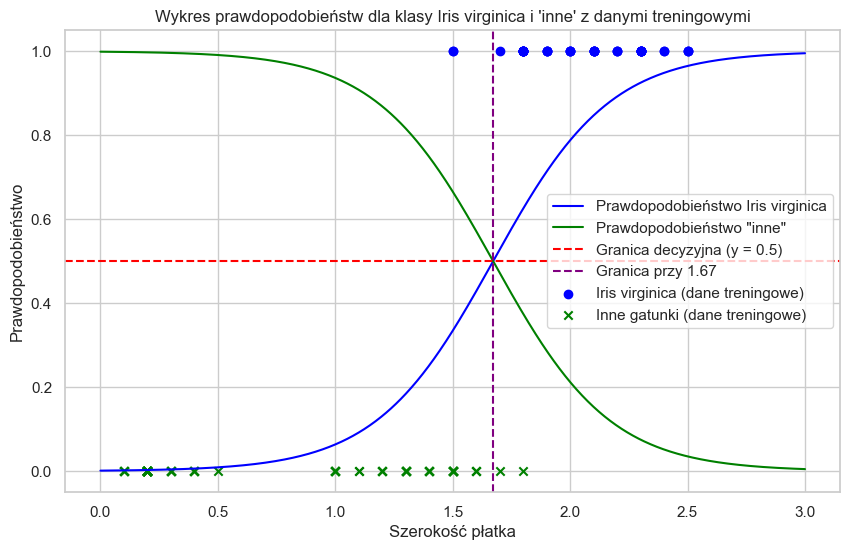

In [49]:
probabilities_other = 1 - probabilities  # przewidywania dla klasy "inne"

# Znalezienie granicy decyzyjnej
decision_boundary_index = np.where(probabilities >= 0.5)[0][0]
decision_boundary = X_new[decision_boundary_index][0]
print(f'Granica decyzyjna szerokości płatka: {decision_boundary}')

# Wykres
plt.figure(figsize=(10, 6))

# Wykres prawdopodobieństw dla klasy Iris virginica oraz "inne"
plt.plot(X_new, probabilities, label='Prawdopodobieństwo Iris virginica', color='blue')
plt.plot(X_new, probabilities_other, label='Prawdopodobieństwo "inne"', color='green')
plt.axhline(0.5, color='red', linestyle='--', label='Granica decyzyjna (y = 0.5)')
plt.axvline(decision_boundary, color='purple', linestyle='--', label=f'Granica przy {decision_boundary:.2f}')

# Dodanie punktów danych treningowych
plt.scatter(X1_train[y1_train == 1], y1_train[y1_train == 1], color='blue', marker='o', label='Iris virginica (dane treningowe)')
plt.scatter(X1_train[y1_train == 0], y1_train[y1_train == 0], color='green', marker='x', label='Inne gatunki (dane treningowe)')

# Opis osi i legenda
plt.xlabel('Szerokość płatka')
plt.ylabel('Prawdopodobieństwo')
plt.title("Wykres prawdopodobieństw dla klasy Iris virginica i 'inne' z danymi treningowymi")
plt.legend()
plt.show()

----

>Zadanie 2b

Regresja logistyczna -> klasyfikację wieloklasową.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

>2.1. Zmienna z macierza cech, i zmienna z kolumna 'species'.

In [51]:
X = df_iris.drop('species', axis=1)

X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
y = df_iris['species']

y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

>2.2. Podział zbioru Iris na podzbiór treningowy i testowy.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


>2.3. Standaryzacja danych.

In [54]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

>2.4. Budowa modelu wieloklasowej regresji logistycznej:

>>2.4.1. Dostrojenie modelu za pomocą metody przeszukiwania losowego.

In [55]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

logr = LogisticRegression(solver='liblinear',max_iter=1500)
param = {'C': np.logspace(0, 4, 10), 'penalty': ['l1', 'l2']}
search = RandomizedSearchCV(logr, param_distributions=param, random_state=101)

>> 2.4.2. Wytrenowanie modelu.

In [56]:
search.fit(X_train, y_train)
best_estr = search.best_estimator_

>>2.4.3. Wypróbowanie modelu na zbiorze testowym.

In [57]:
y_pred = best_estr.predict(X_test_sc)

y_pred

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

>>2.4.4. Ewaluacja modelu na podstawie raportu z klasyfikacji i macierzy błędów.

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      0.90      0.95        10
  versicolor       0.85      1.00      0.92        17
   virginica       1.00      0.82      0.90        11

    accuracy                           0.92        38
   macro avg       0.95      0.91      0.92        38
weighted avg       0.93      0.92      0.92        38



In [59]:
print(confusion_matrix(y_test, y_pred))

[[ 9  1  0]
 [ 0 17  0]
 [ 0  2  9]]


>>2.4.5. Krzywa ROC.

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


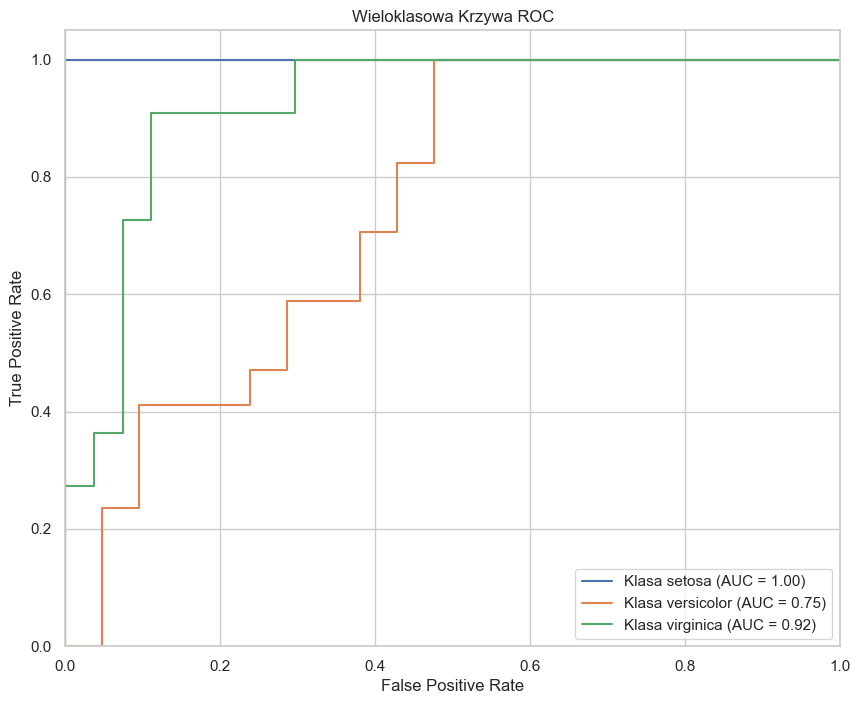

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizacja etykiet (każda klasa jest traktowana osobno dla "one-vs-rest")
y_test_bin = label_binarize(y_test, classes=y.unique())
n_classes = y_test_bin.shape[1]

# Obliczanie prawdopodobieństw dla zbioru testowego
y_score = best_estr.decision_function(X_test_sc)

# Wykres ROC dla każdej klasy
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Klasa {y.unique()[i]} (AUC = {roc_auc:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Wieloklasowa Krzywa ROC')
plt.legend(loc="lower right")
plt.show()


>>2.4.6. Krzywa czułość/precyzja.

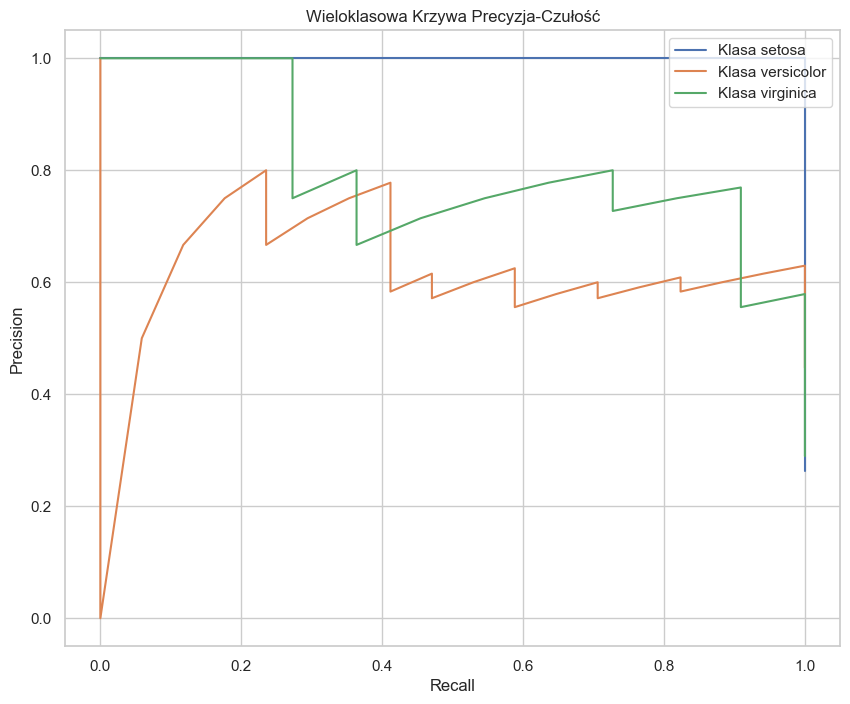

In [61]:
from sklearn.metrics import precision_recall_curve

# Wykres precyzja-czułość dla każdej klasy
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Klasa {y.unique()[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Wieloklasowa Krzywa Precyzja-Czułość')
plt.legend(loc="upper right")
plt.show()

----